In [3]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.4 MB/s eta 0:00:00


In [4]:
pip install qiskit

In [23]:
pip install qiskit-aer


In [8]:
#pip install qiskit   #remove this to install qiskit
import qiskit
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2

# **Create a Quantum Circuit with a Hadamard Gate**

- Write a Qiskit program to create a single-qubit circuit.
- Apply a Hadamard gate to the qubit.
- Measure the qubit and visualize the result using a histogram.

In [13]:
#Insert the code here
circ = qiskit.QuantumCircuit(1)
# apply hadamard gate to the qubit
circ.h(0)
# Measure the qubit
circ.measure_all()

# Visualize the circuit
circ.draw()


┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

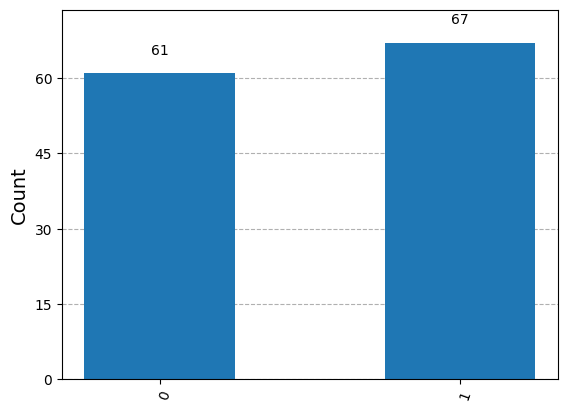

In [16]:
# Construct an ideal simulator with SamplerV2
sampler = SamplerV2()
job = sampler.run([circ], shots=128)

# Perform an ideal simulation
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()


# Visualize the results
plot_histogram(counts_ideal)

# **Implement a Quantum Coin Flip**
- Simulate a fair coin flip using a quantum circuit.
- Print the probability of getting Heads or Tails.

In [33]:
#insert the code
# Create a quantum circuit with 1 qubit and 1 classical bit
circ = qiskit.QuantumCircuit(1, 1)
circ.h(0)  # Apply Hadamard gate to create superposition
# Measure the qubit
circ.measure_all()

# Visualize the circuit
circ.draw()

┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
   c: 1/═════════╬═
                 ║ 
meas: 1/═════════╩═
                 0

In [34]:
# Run the circuit using Qiskit’s Sampler
sampler = SamplerV2()
job = sampler.run([circ], shots=200)  # Run the circuit 1000 times
result = job.result()

In [35]:
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()

# Compute probabilities
total_shots = len(counts_ideal)
prob_heads = counts_ideal.get("1", 0) / total_shots  # Probability of |1⟩ (Heads)
prob_tails = counts_ideal.get("0", 0) / total_shots  # Probability of |0⟩ (Tails)

Probability of Heads: 48.00
Probability of Tails: 52.00


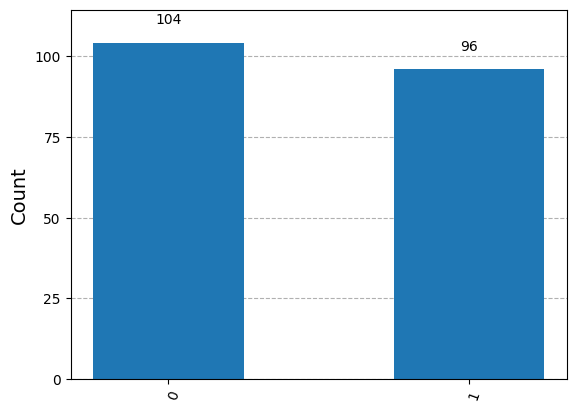

In [39]:
# Print results
print(f"Probability of Heads: {prob_heads:.2f}")
print(f"Probability of Tails: {prob_tails:.2f}")

# Plot histogram
plot_histogram(counts_ideal)

# **Implement a Bell State (Entanglement)**
- Create a two-qubit circuit.
- Apply a Hadamard gate to the first qubit and a CNOT gate between the two qubits.
- Measure both qubits and verify if they are always correlated.

In [42]:
#insert your code here
circ = qiskit.QuantumCircuit(2)
# apply hadamard gate to the qubit
circ.h(0)
# apply CNOT on the circ
circ.cx(0,1)
# measure the circ
circ.measure_all()

# Visualize the circuit
circ.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

Counts(ideal): {'11': 66, '00': 62}


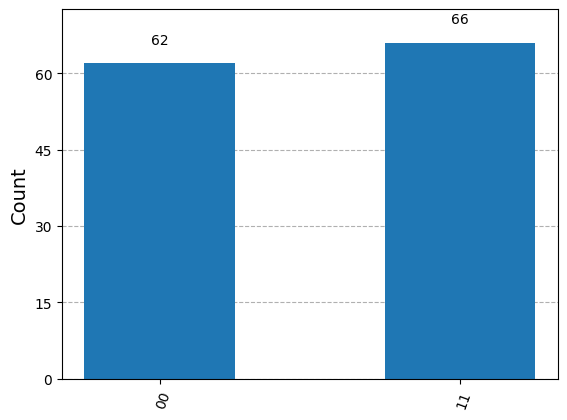

In [43]:
# Construct an ideal simulator with SamplerV2
sampler = SamplerV2()
job = sampler.run([circ], shots=128)

# Perform an ideal simulation
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()

# Print the ideal measurement results
print('Counts(ideal):', counts_ideal)

# Visualize the results as a histogram
plot_histogram(counts_ideal)

# **Generate Plus state**
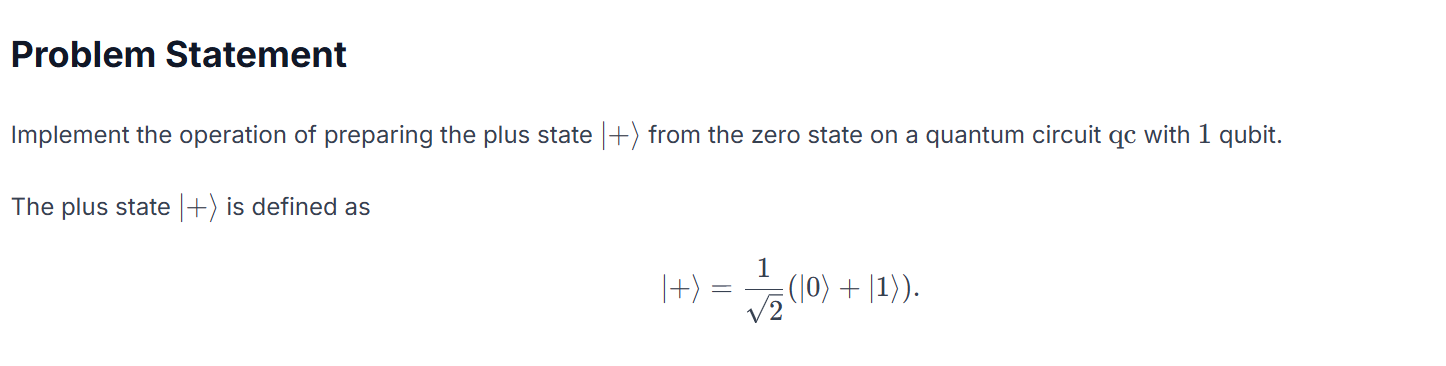

In [44]:
#insert your code here
# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Apply Hadamard gate to the qubit (|0> -> |+>)
qc.h(0)

# Measure the qubit to get the result
qc.measure_all()

In [47]:
# Use Sampler to run the circuit
sampler = SamplerV2()
job = sampler.run([circ], shots=1000)  # Run the circuit 1000 times
result = job.result()

In [49]:
# Perform an ideal simulation
counts_ideal = result[0].data.meas.get_counts()

Probability of |0>: 52.00
Probability of |1>: 48.00


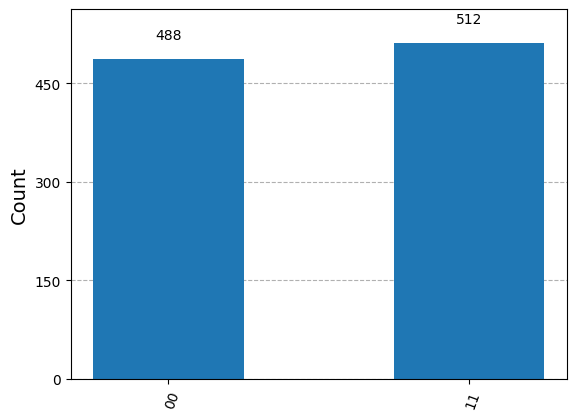

In [51]:
# Print results
print(f"Probability of |0>: {prob_tails:.2f}")
print(f"Probability of |1>: {prob_heads:.2f}")

# Plot histogram
plot_histogram(counts_ideal)

# **Theory Checkins**

### **How does superposition affect the information processing capabilities of a quantum computer?**

**insert your answer here**


Superposition allows a quantum computer's qubits to exist in multiple states (0 and 1) at the same time. This enables it to process many calculations simultaneously, making it much faster than classical computers for certain tasks.

###How do quantum gates manipulate interference to solve problems faster than classical computers?

**insert your answer here**

Quantum gates manipulate interference by controlling the phase and probability of qubit states. They use constructive interference to amplify correct solutions and destructive interference to cancel out incorrect ones. This enhances computational efficiency, allowing quantum computers to solve certain problems much faster than classical computers.

### How does measurement collapse a quantum state, and why is it important in quantum computing algorithms?

**insert your answer here**

Measurement collapses a quantum state by forcing a qubit, which exists in a superposition of multiple states, to take on a definite value (either 0 or 1). This is important in quantum computing because it allows us to extract useful information from quantum computations. However, since measurement destroys superposition, algorithms are designed to maximize interference and probability amplitudes before measurement to ensure the most likely outcome is the correct solution.